# About The Data
Our goal for this lab is to construct a model that can take a certain set of features related to the Titanic and predict whether a person survived or not (0 or 1). Since we're trying to predict a binary categorical variable (1 or 0), logistic regression seems like a good place to start from.

The dataset that we'll be using for this task comes from kaggle.com and contains the following attributes:

    PassengerId
    Survived (0 or 1)
    Pclass: Ticket class (1, 2, or 3 where 3 is the lowest class)
    Name
    Sex
    Age: Age in years
    SibSp: # of siblings / spouses aboard the Titanic
    Parch: # of parents / children aboard the Titanic
    Ticket: Ticket number
    Fare: Passenger fare
    Cabin: Cabin number
    Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
    
Note before starting: Please refer back to the matplotlib lab if you're having trouble creating any graphs up to this point. You're free to use any library to create your graphs, so don't feel like you need to match this code 100%.

In [100]:
# Importing numpy, pandas, matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# Importing rcParams from matplotlib
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [102]:
# Read file data of titanic.csv
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
# My practical code
# We can see a little more by doing head(10)
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [104]:
# Example code from pdf
# Get the sense of the titanic data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [105]:
# My practical code
# Let try some parameters in .describe()
titanic_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [106]:
# Example code from pdf
# Get the titanic data info
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
# My practical code
# Lets add memory_usage to deep in .info()
titanic_data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 315.0 KB


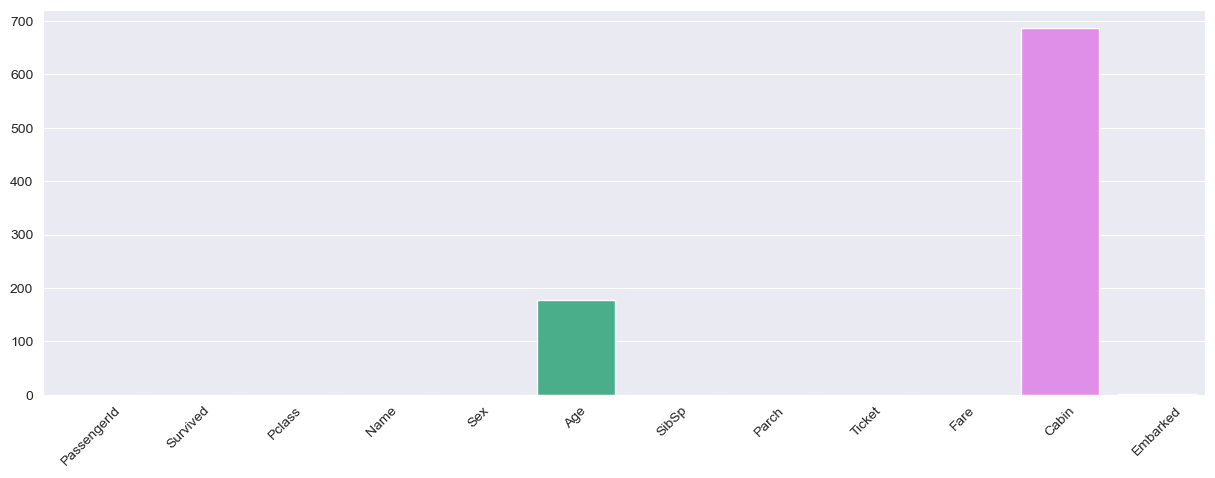

In [108]:
# Example code from pdf
sns.barplot(x = titanic_data.columns, y = titanic_data.isnull().sum().values)
plt.xticks(rotation = 45)
plt.show()

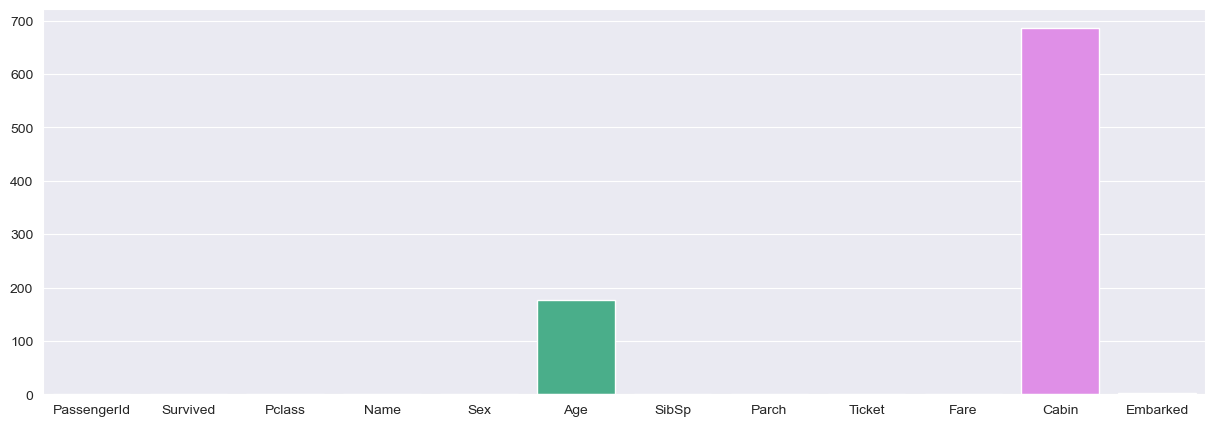

In [109]:
# My practical code
# Remove xticks(rotation)
sns.barplot(x = titanic_data.columns, y = titanic_data.isnull().sum().values)
plt.show()

In [110]:
# Example code from pdf
# See what titanic_data.isnull() does
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [111]:
# Example code from pdf
# See what titanic_data.notnull() does
titanic_data.notnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,False,True
887,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,True,True,False,True,True,True,True,False,True
889,True,True,True,True,True,True,True,True,True,True,True,True


In [112]:
# Example code from pdf
# Now see what calling .sum() do, which sums the missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [113]:
# My practical code
# after .isnull()  Calling .any() to see if null
# values are found then return true otherwise false. 
titanic_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [114]:
# Example code from pdf
# calling .values to give us missing values counts for each columns
titanic_data.isnull().sum().values

array([  0,   0,   0,   0,   0, 177,   0,   0,   0,   0, 687,   2],
      dtype=int64)

In [115]:
# My practical code
# Lets try calling .index
titanic_data.isnull().sum().index

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

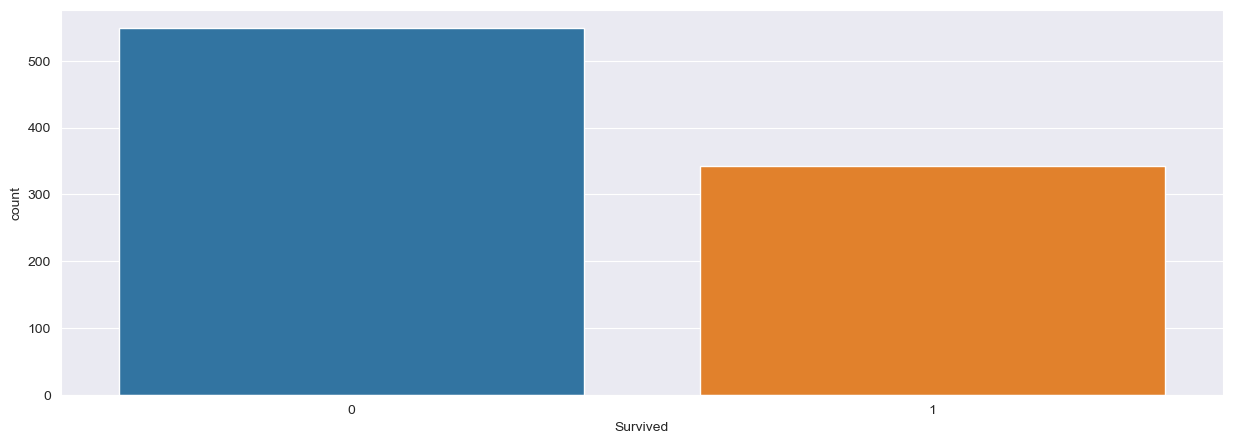

In [116]:
# Example code from pdf
# show countplot to see how many survived or not
sns.countplot(x = titanic_data['Survived'])
plt.show()

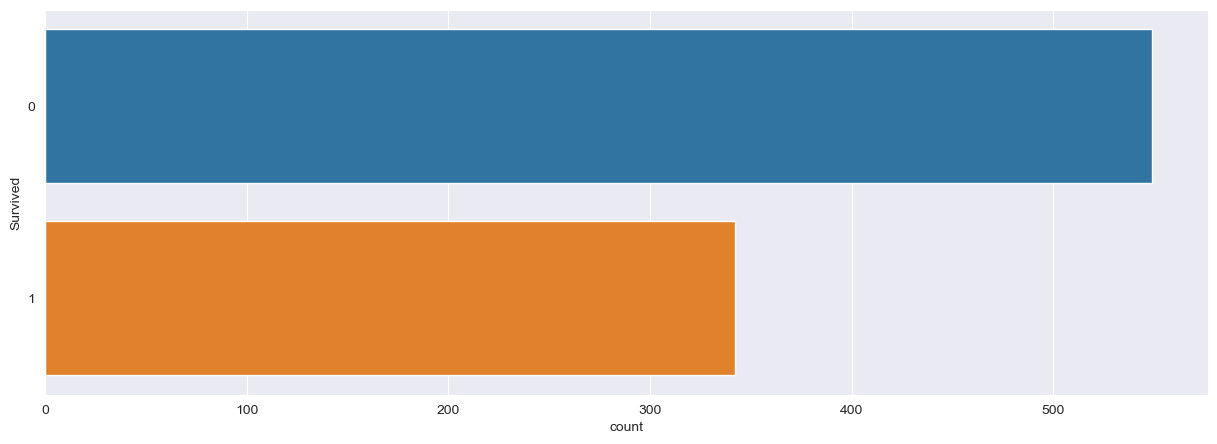

In [117]:
# My practical code
# Lets try plot horizontally
sns.countplot(y = titanic_data['Survived'])
plt.show()

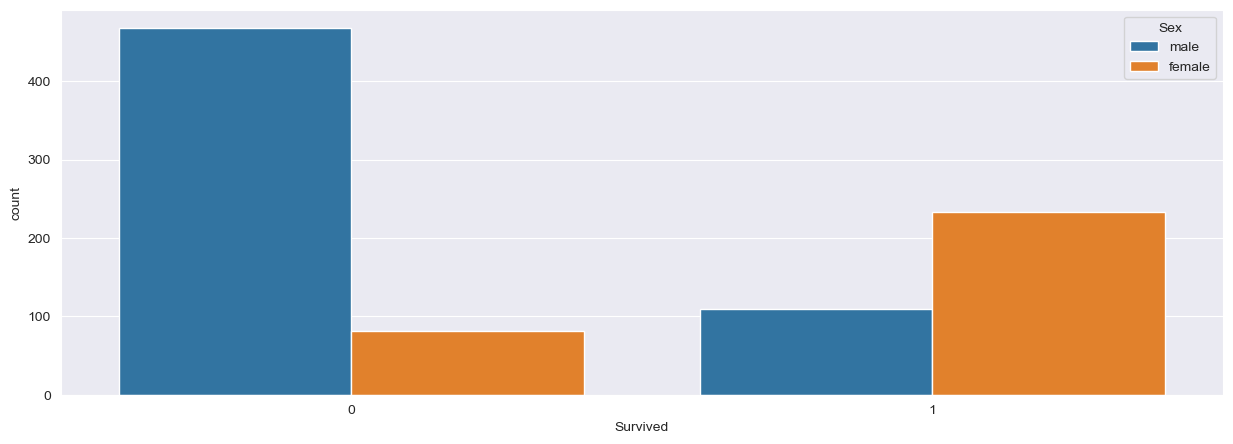

In [118]:
# Example code from pdf
# See both genders by using hue = 'Sex'
sns.countplot(x = titanic_data['Survived'], hue = 'Sex', data = titanic_data)
plt.show()

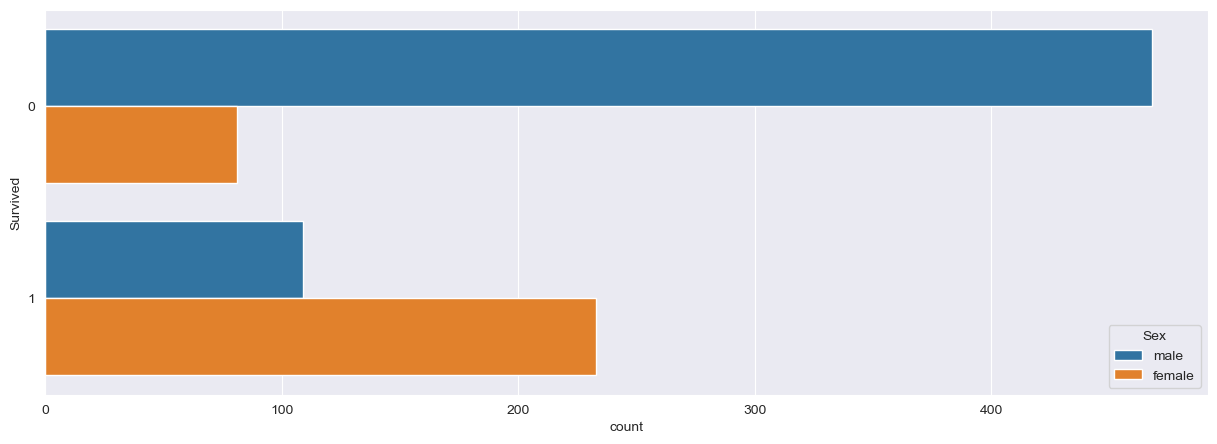

In [119]:
# My practical code
# Plot horizontally
sns.countplot(y = titanic_data['Survived'], hue = 'Sex', data = titanic_data)
plt.show()

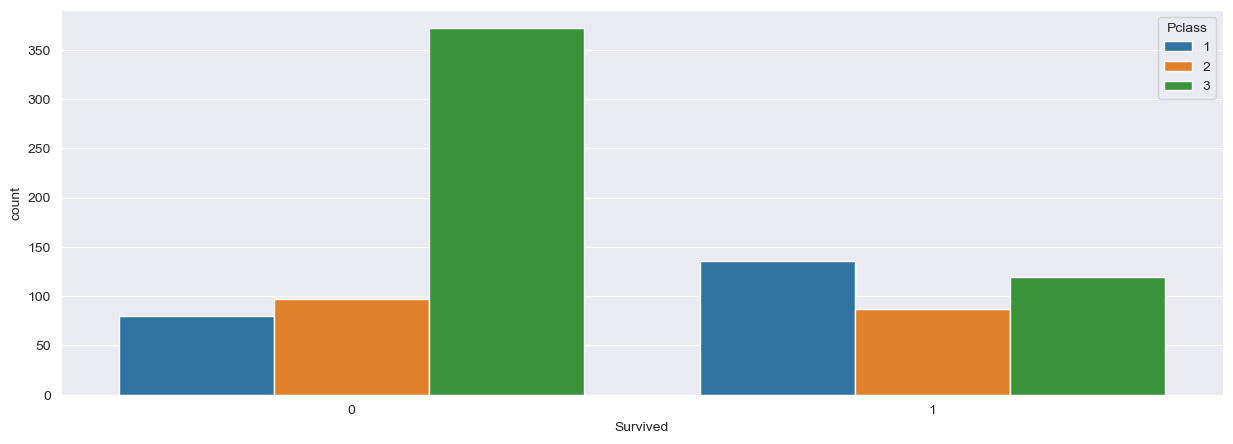

In [120]:
# Example code from pdf
# See ticket class by using hue = 'Pclass'
sns.countplot(x = titanic_data['Survived'], hue = 'Pclass', data = titanic_data)
plt.show()

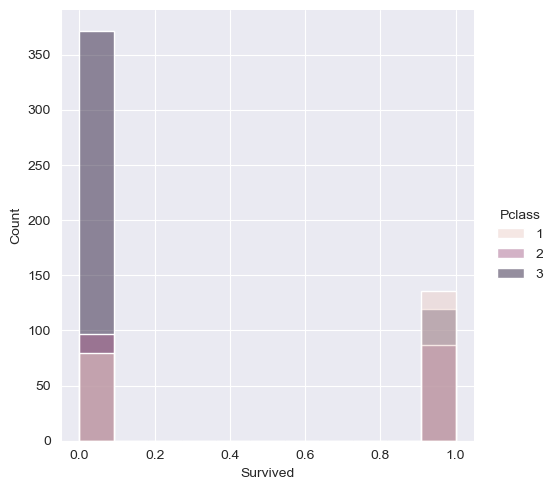

In [121]:
# My practical code
# Lets see in a displot
sns.displot(x = titanic_data['Survived'], hue = 'Pclass', data = titanic_data)
plt.show()

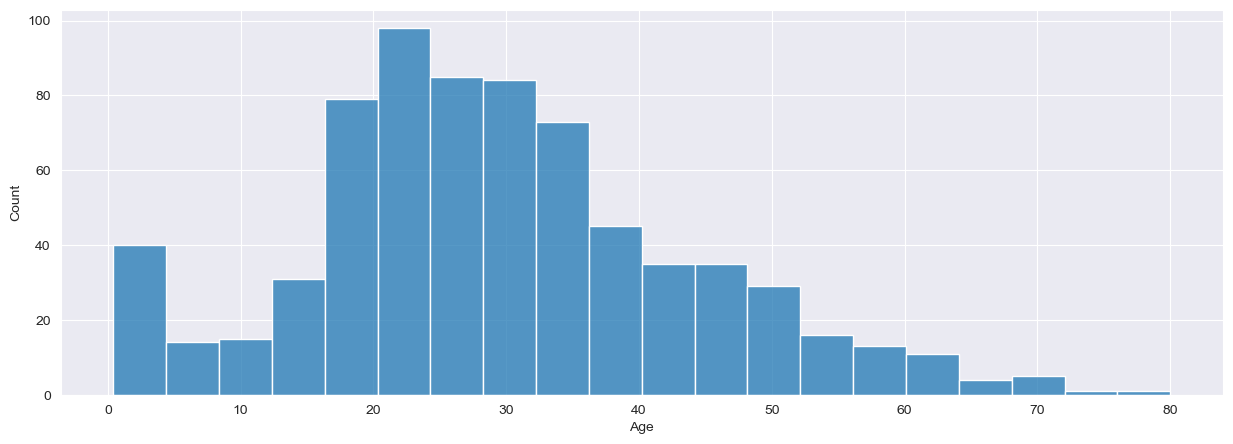

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [122]:
# Example code from pdf
# See histplot for ages
sns.histplot(x = titanic_data['Age'].dropna())
plt.show()
titanic_data['Age'].describe()

In [123]:
# My practical code
# I want to see what .dropna() is
titanic_data['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

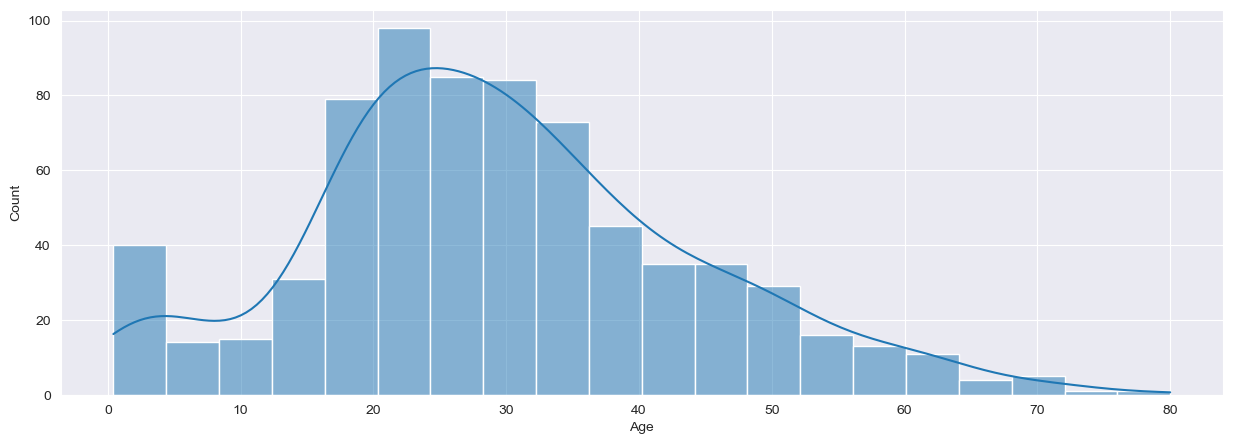

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [124]:
# My practical code
# From the example on histplot for ages
# Lets add a kernal density estimate
sns.histplot(x = titanic_data['Age'].dropna(), kde = True)
plt.show()
titanic_data['Age'].describe()

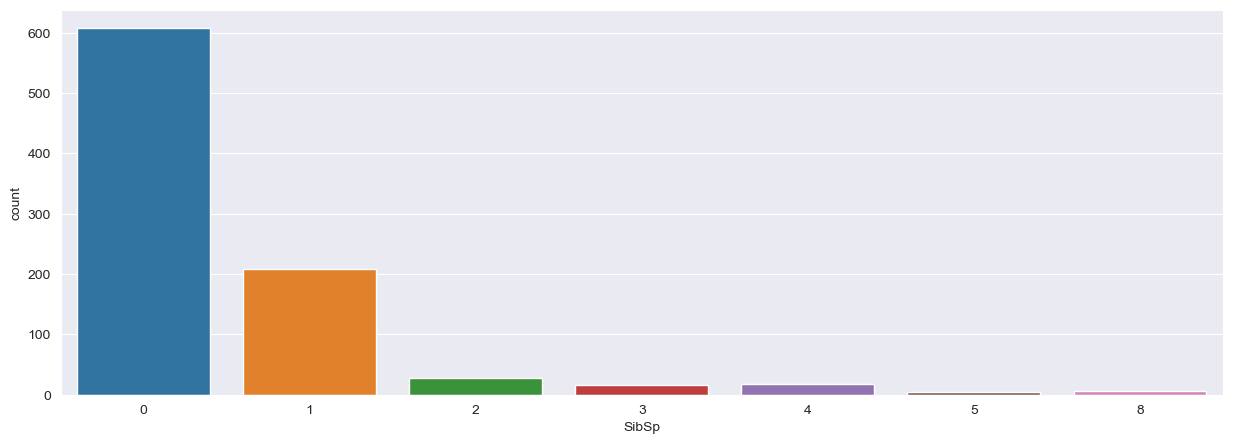

In [125]:
# Example code from pdf
# See countplot for siblings
sns.countplot(x = titanic_data['SibSp'])
plt.show()

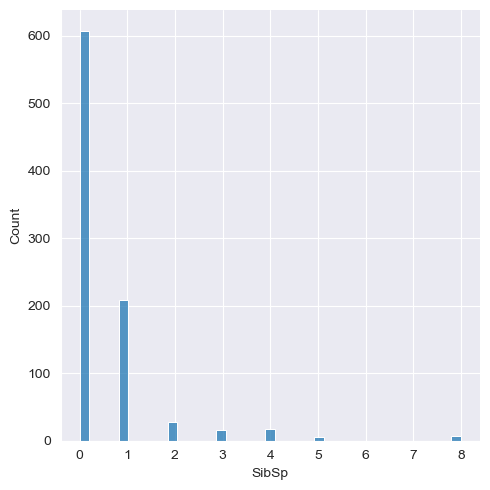

In [126]:
# My practical code
# See displot for siblings
sns.displot(x = titanic_data['SibSp'])
plt.show()

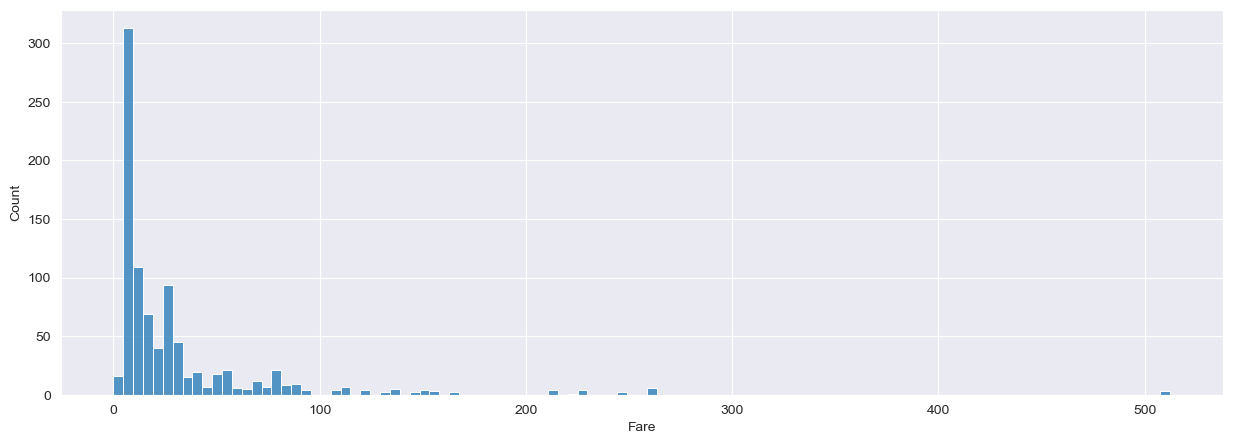

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [127]:
# See how much did the average person pay
# Display histplot
sns.histplot(x = titanic_data['Fare'])
plt.show()
titanic_data['Fare'].describe()

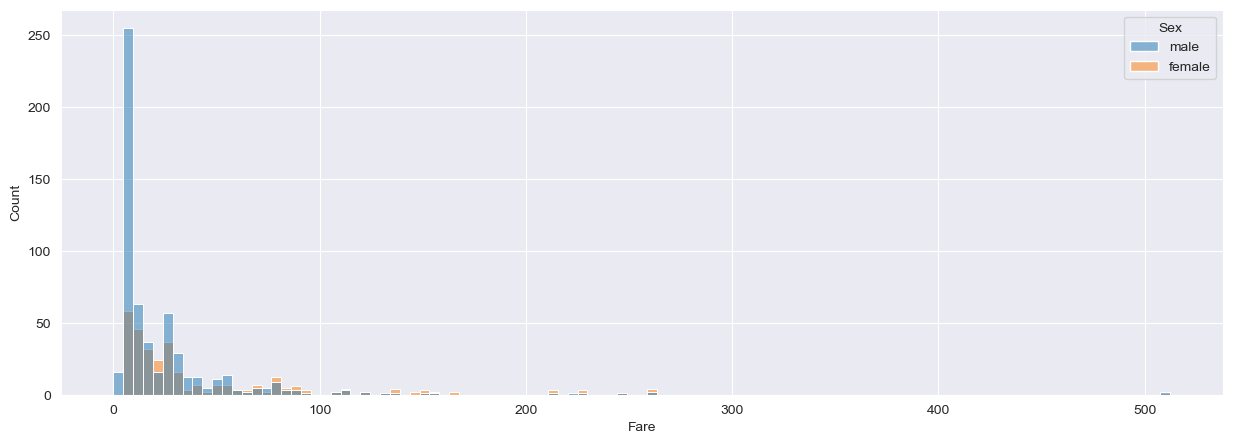

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [128]:
# My practical code
# See genders 
sns.histplot(x = titanic_data['Fare'], hue = 'Sex', data = titanic_data)
plt.show()
titanic_data['Fare'].describe()

# Data Preprocessing
Let's first take care of our missing values. Recall how much data was missing:

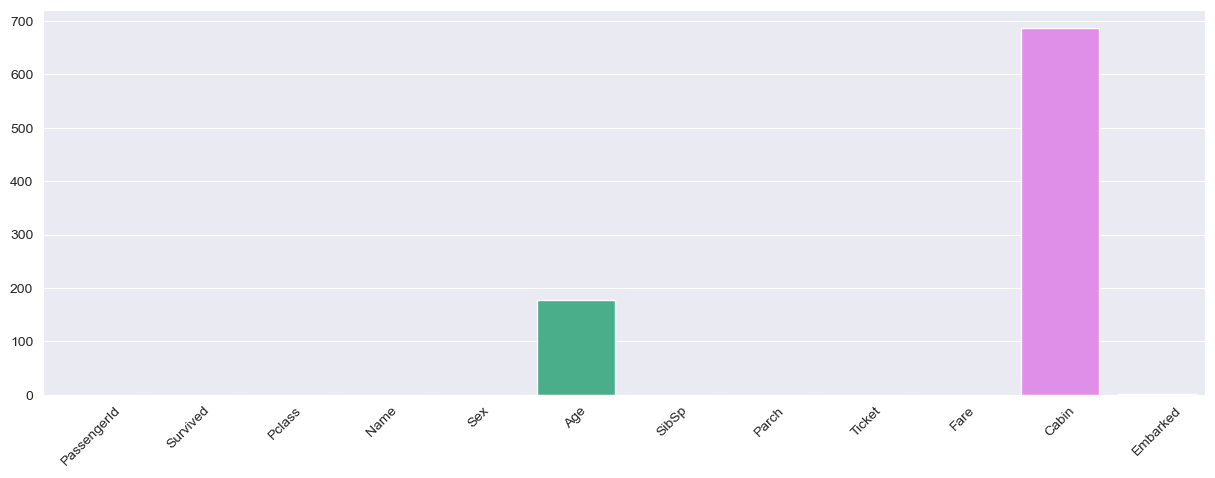

In [129]:
# Example code from pdf
# See missing values again on barplot
sns.barplot(x = titanic_data.columns, y = titanic_data.isnull().sum().values)
plt.xticks(rotation = 45)
plt.show()

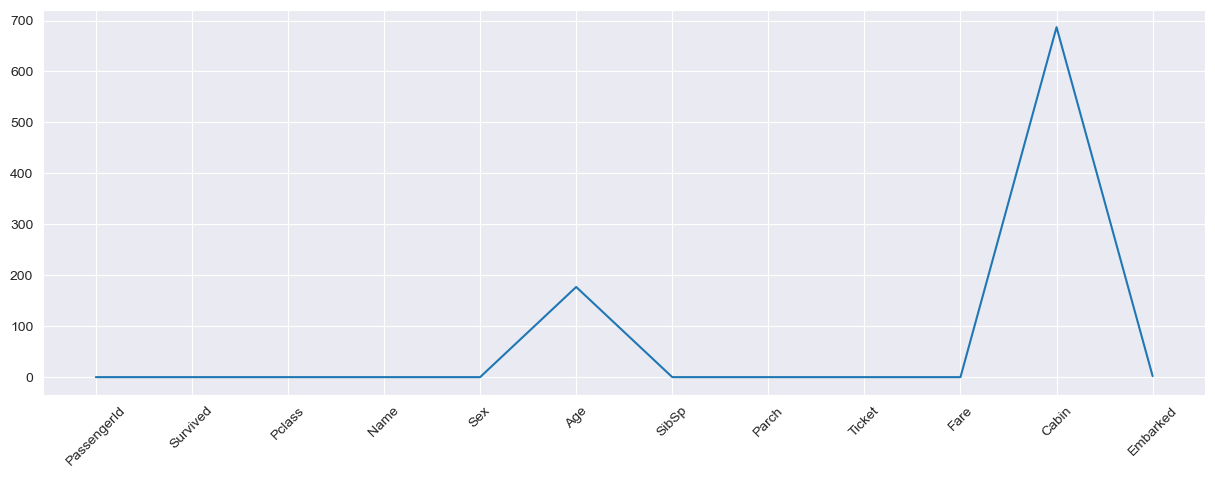

In [130]:
# My pracitical code
# Lets see it in a different plot as well
# Using lineplot
sns.lineplot(x = titanic_data.columns, y = titanic_data.isnull().sum().values)
plt.xticks(rotation = 45)
plt.show()

In [131]:
# missing value with mean age
# calling .apply(func) with lambda
mean_age = int(titanic_data['Age'].mean())
titanic_data['Age'] = titanic_data['Age'].apply(lambda age : mean_age if pd.isnull(age) else age)

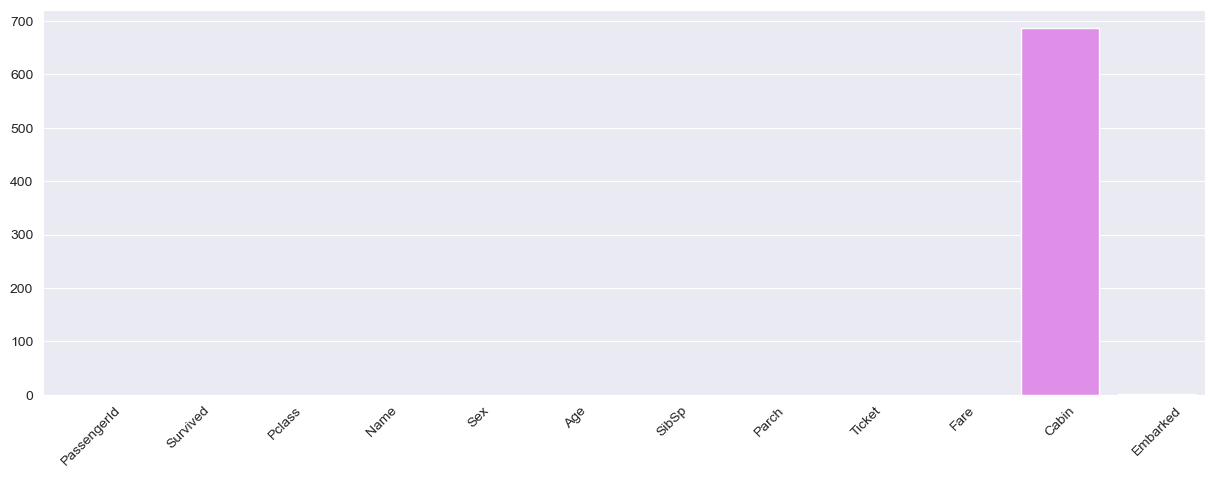

In [132]:
# Example code from pdf
# Recreate the barplot to see the missing value for age is gone
sns.barplot(x = titanic_data.columns, y = titanic_data.isnull().sum().values)
plt.xticks(rotation = 45)
plt.show()

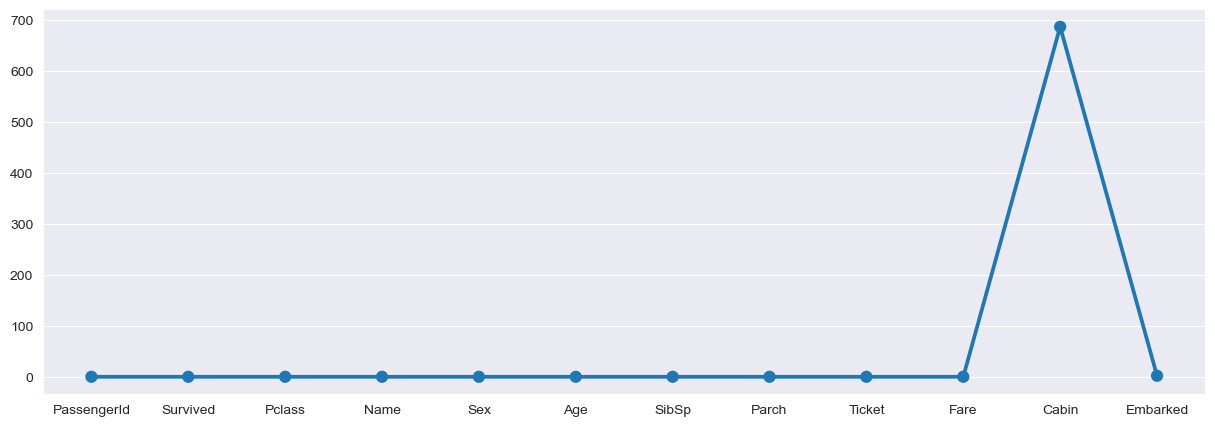

In [133]:
# My practical code
# display in pointplot and remove xticks rotation
sns.pointplot(x = titanic_data.columns, y = titanic_data.isnull().sum().values)
plt.show()

In [134]:
# Example code from pdf
# Drop 'Cabin' column
titanic_data.drop(labels = ['Cabin'], axis = 1, inplace = True)
titanic_data.dropna(inplace = True)

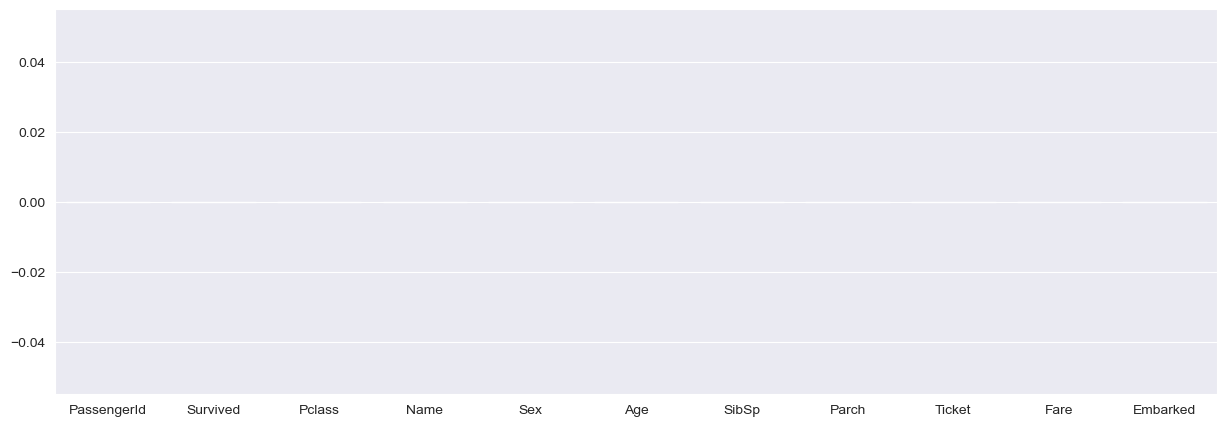

In [135]:
# My practical code
# Lets see 'Cabin' column is removed
sns.barplot(x = titanic_data.columns, y = titanic_data.isnull().sum().values)
plt.show()

In [136]:
# Example code from pdf
# We can see in .info() to see any missing values
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [137]:
# My practical code
titanic_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Columns: 11 entries, PassengerId to Embarked
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [138]:
# Example code from pdf
# Creating a dummiy variable
# Drop Name and Ticket column
titanic_data = pd.get_dummies(data = titanic_data, columns = ['Sex', 'Embarked'], drop_first = True)
titanic_data.drop(labels = ['Name', 'Ticket'], axis = 1, inplace = True)

In [139]:
# Example code from pdf
# See the head of the titanic data
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [140]:
# My practical code
# Lets see how calling the describe method looks like now
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.514252,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,256.998173,0.486260,0.834700,12.970884,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


# Creating our Logistic Regression Model
We're now ready to begin creating and training our model. We first need to split our data into training and testing sets. This can be done using sklearn's train_test_split(X, y, test_size) function. This function takes in your features (X), the target variable (y), and the test_size you'd like (Generally a test size of around 0.3 is good enough). It will then return a tuple of X_train, X_test, y_train, y_test sets for us. We will train our model on the training set and then use the test set to evaluate the model.

In [141]:
# Training and Testing our model
from sklearn.model_selection import train_test_split

X = titanic_data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]

y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [142]:
# Begin training by using fit(train_data, train_data_labels)
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Model Evaluation
Now that we've finished training, we can make predictions off of the test data and evaluate our model's performance using the corresponding test data labels (y_test).

In [143]:
# Predictions
predictions = logmodel.predict(X_test)

In [144]:
# Importing sklearn classification and confusion
# Print them out
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       164
           1       0.83      0.74      0.78       103

    accuracy                           0.84       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267

[[148  16]
 [ 27  76]]


In [145]:
# My practical code
# Lets do a Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       164
           1       0.69      0.72      0.70       103

    accuracy                           0.76       267
   macro avg       0.75      0.76      0.75       267
weighted avg       0.77      0.76      0.77       267

[[130  34]
 [ 29  74]]
